In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
%matplotlib inline

In [107]:
url = 'https://www.opengov-muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv'

In [108]:
df = pd.read_csv(url)
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN


In [109]:
# dropping all columns but the first five, which are the important ones
df = df.drop(df.columns[5:], axis=1)
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN


In [110]:
# info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1995 non-null   object 
 1   AUSPRAEGUNG  1995 non-null   object 
 2   JAHR         1995 non-null   int64  
 3   MONAT        1995 non-null   object 
 4   WERT         1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 78.1+ KB


In 'WERT' there are null values

In [111]:
df[df['WERT'].isnull()]

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN
...,...,...,...,...,...
1717,Verkehrsunfälle,Verletzte und Getötete,2021,202108,NaN
1718,Verkehrsunfälle,Verletzte und Getötete,2021,202109,NaN
1719,Verkehrsunfälle,Verletzte und Getötete,2021,202110,NaN
1720,Verkehrsunfälle,Verletzte und Getötete,2021,202111,NaN


The null values are all values from the year 2021, which is the one that we are going to predict, so all will be dropped

In [112]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 12 to 1994
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1911 non-null   object 
 1   AUSPRAEGUNG  1911 non-null   object 
 2   JAHR         1911 non-null   int64  
 3   MONAT        1911 non-null   object 
 4   WERT         1911 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 89.6+ KB


In [113]:
df.head(15)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
12,Alkoholunfälle,insgesamt,2020,Summe,430.0
13,Alkoholunfälle,insgesamt,2020,202001,28.0
14,Alkoholunfälle,insgesamt,2020,202002,40.0
15,Alkoholunfälle,insgesamt,2020,202003,27.0
16,Alkoholunfälle,insgesamt,2020,202004,26.0
17,Alkoholunfälle,insgesamt,2020,202005,40.0
18,Alkoholunfälle,insgesamt,2020,202006,49.0
19,Alkoholunfälle,insgesamt,2020,202007,58.0
20,Alkoholunfälle,insgesamt,2020,202008,46.0
21,Alkoholunfälle,insgesamt,2020,202009,46.0


It can be noticed, that there are in the 'MONAT' column an entry each twelve month 'Summe', which is the yearly sum, it will be confirmed and then dropped if it matches

In [114]:
# creating a dataframe containing all observations without the sum
df_normal = df[df['MONAT'] != 'Summe']
# creating a dataframe containing only the sum observations
df_sum = df[df['MONAT'] == 'Summe']
print(sum(df_sum['WERT']) == sum(df_normal['WERT']))

True


The values are identical, so the data will be processed without the summed values

In [115]:
df = df_normal

In the data explanation it was mentioned that 'insgesamt' in the 'AUSPRAEGUNG' column means the sum of all sub-categories, so we can check if the sum of 'insgesamt' values match the sum of the rest of the values. In case it doesn't match, all subcategories will be dropped and will continue only with the 'insgesamt value for each category.

In [116]:
# creating a dataframe containing all observations without the sum
df_insgesamt = df[df['AUSPRAEGUNG'] == 'insgesamt']
# creating a dataframe containing only the sum observations
df_rest = df[df['AUSPRAEGUNG'] != 'insgesamt']
print(sum(df_insgesamt['WERT']) == sum(df_rest['WERT']))

False


The values does not match, that means that there are some missing subcategories, there are now to possibilities
1. deal with 'insgesamt' as the values of the rest of the subcategories, and remove from it the values of the other subcategories that are present
2. remove all the other present subcategories, and deal only with 'insgesamt'

In this case, the second possibility will be chosen and the second column will be dropped, as it is no more needed, and the values present will be of the main categories.

In [135]:
df = df_insgesamt.drop('AUSPRAEGUNG', axis=1)

In [136]:
print(df.head())
print('-'*50)
print(df.dtypes)
print('-'*50)
print(df.MONATSZAHL.unique())

        MONATSZAHL  JAHR   MONAT  WERT
13  Alkoholunfälle  2020  202001  28.0
14  Alkoholunfälle  2020  202002  40.0
15  Alkoholunfälle  2020  202003  27.0
16  Alkoholunfälle  2020  202004  26.0
17  Alkoholunfälle  2020  202005  40.0
--------------------------------------------------
MONATSZAHL     object
JAHR            int64
MONAT          object
WERT          float64
dtype: object
--------------------------------------------------
['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']


It can be observed that there are three main categories, and that the 'MONAT' column is of type 'object'. The 'MONAT' column will be converted into integer, and create a timestamp of a monthly frequency using it, then dropping both the 'JAHR', and 'MONAT' columns

In [137]:
import datetime
df['DATE'] = df['MONAT'].apply(lambda x: datetime.datetime(year=int(x[:-2]), month=int(x[-2:]), day=1))
df = df[['MONATSZAHL', 'DATE', 'WERT']]
df.head()

,MONATSZAHL,DATE,WERT
13,Alkoholunfälle,2020-01-01,28.0
14,Alkoholunfälle,2020-02-01,40.0
15,Alkoholunfälle,2020-03-01,27.0
16,Alkoholunfälle,2020-04-01,26.0
17,Alkoholunfälle,2020-05-01,40.0


Now, making the 'DATE' column as the index, and adding each category as a column containing the values from the 'WERT' column to have the accidents per category for each month.

In [138]:
df = df.groupby(['DATE', 'MONATSZAHL']).sum().unstack(level=1)
df.head()

WERT                              
MONATSZAHL Alkoholunfälle Fluchtunfälle Verkehrsunfälle
DATE                                                   
2000-01-01           78.0         835.0          3448.0
2000-02-01           53.0         890.0          3181.0
2000-03-01           73.0         974.0          3783.0
2000-04-01           78.0         834.0          3317.0
2000-05-01           96.0        1086.0          4123.0

In [139]:
# dropping the first level if the column index in order to contain only the categories
df = df.droplevel(0, axis=1)

In [140]:
# Looking at the data
df.head()

MONATSZAHL,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle
DATE,,,
2000-01-01,78.0,835.0,3448.0
2000-02-01,53.0,890.0,3181.0
2000-03-01,73.0,974.0,3783.0
2000-04-01,78.0,834.0,3317.0
2000-05-01,96.0,1086.0,4123.0


Now that the data is cleaned and preprocessed, a bit of exploration for the data can be done, then the visualisation accordingly

MONATSZAHL  Alkoholunfälle  Fluchtunfälle  Verkehrsunfälle
count           252.000000     252.000000       252.000000
mean             43.753968     879.428571      3537.198413
std              18.069448     135.216334       479.649632
min              10.000000     411.000000      2251.000000
25%              30.750000     793.750000      3205.750000
50%              40.000000     877.500000      3487.000000
75%              53.250000     966.250000      3906.750000
max             107.000000    1187.000000      4763.000000


<AxesSubplot:>

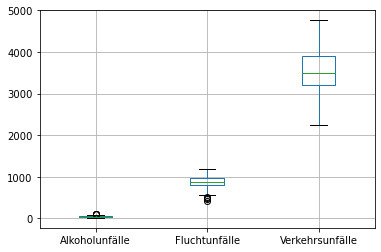

In [141]:
print(df.describe())
df.boxplot()

It can be noted that the values vary a lot from one category to another, so each category will be visualised alone, and checked if there are any correlation between them

Now checking for seasonality and trend for each time series category, then plotting All of them.

In [142]:
import statsmodels.api as sm
categories = list(df.columns)
decomposition_dict = {}

In [143]:
for category in categories:
    decomposition = sm.tsa.seasonal_decompose(df[category])
    decomposition_dict[category] = decomposition

In [145]:
trend_dict = {}
seasonality_dict = {}

for category in categories:
    trend_dict[category] = decomposition_dict[category].trend

trend_df = pd.DataFrame.from_dict(trend_dict)

for category in categories:
    seasonality_dict[category] = decomposition_dict[category].seasonal

seasonality_df = pd.DataFrame.from_dict(seasonality_dict)

In [147]:
plt.style.use('fivethirtyeight')

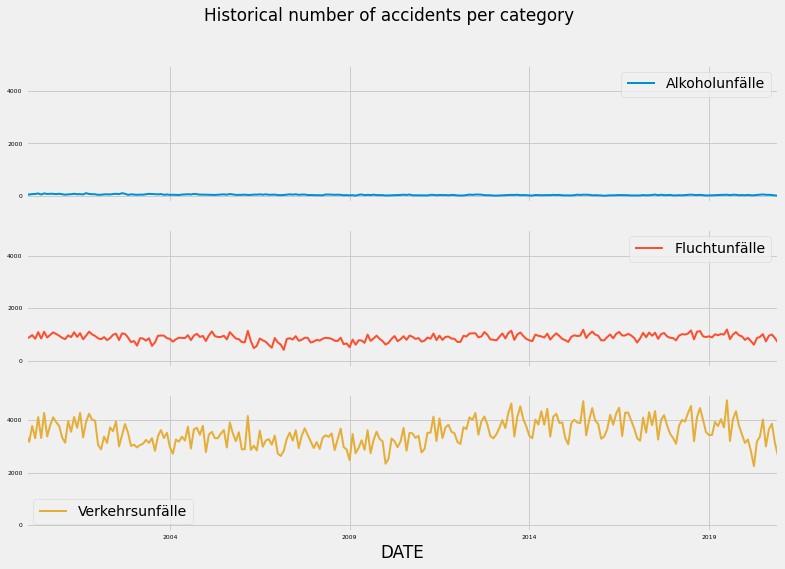

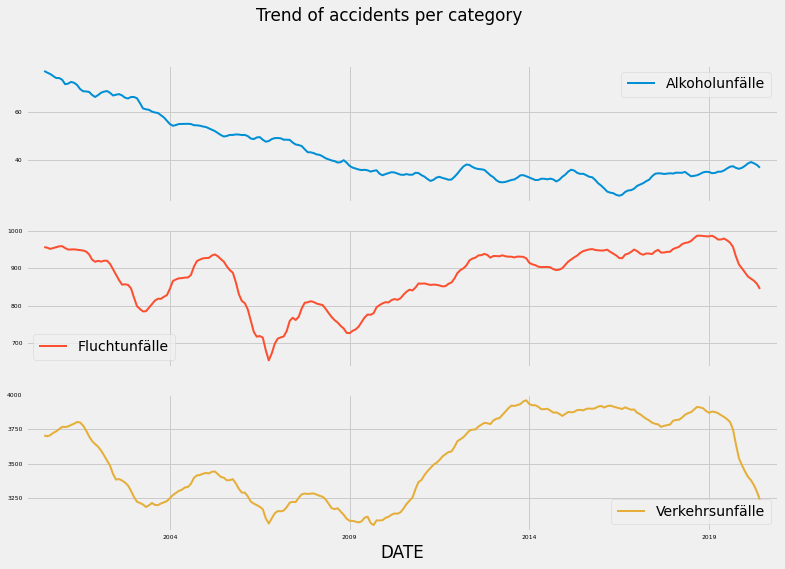

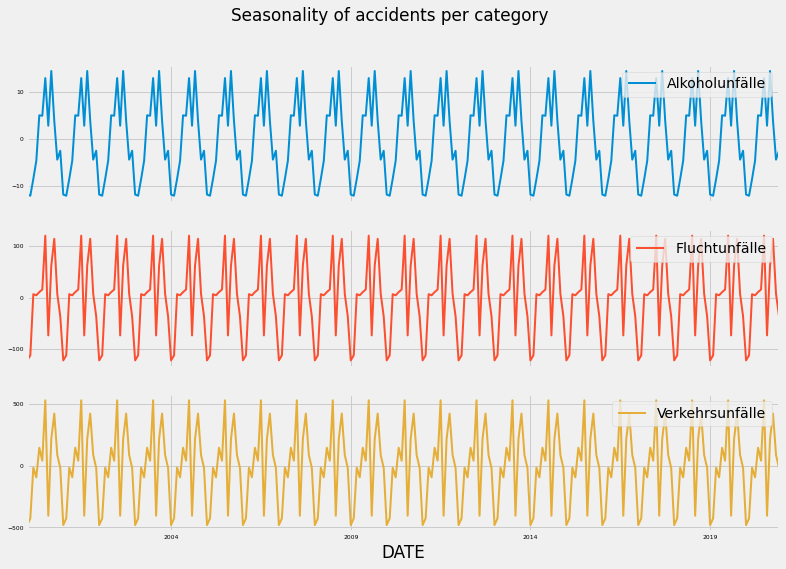

In [167]:
ax = df.plot(subplots=True, figsize=(12,8), fontsize=6, linewidth=2,
             sharey=True,
            title='Historical number of accidents per category',)

ax1 = trend_df.plot(subplots=True, figsize=(12,8), fontsize=6, linewidth=2,
                    title='Trend of accidents per category')

ax2 = seasonality_df.plot(subplots=True, figsize=(12,8), fontsize=6, linewidth=2,
                          title='Seasonality of accidents per category')